# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 4.6715	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.6843	 Accuracy 0.0824
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.1876	 A

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7773.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.1787	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2594	 Accuracy 0.0696
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8812	 Accuracy 0.0826
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.6886	 Accuracy 0.0985
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.5505	 Accuracy 0.1104
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.4484	 Accuracy 0.1265
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.3639	 Accuracy 0.1421
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.2924	 Accuracy 0.1573
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.2315	 Accuracy 0.1740
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.1803	 Accuracy 0.1886
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.1362	 Accuracy 0.2011

Epoch [0]	 Average training loss 1.0964	 Average training accuracy 0.2140
Epoch [0]	 Average validation loss 0.6769	 Average validation accuracy 0.3702

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.6371	 Accuracy 0.3900

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8578.



## 绘制曲线

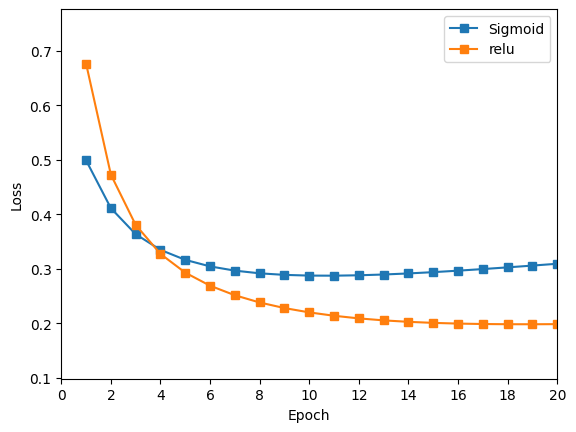

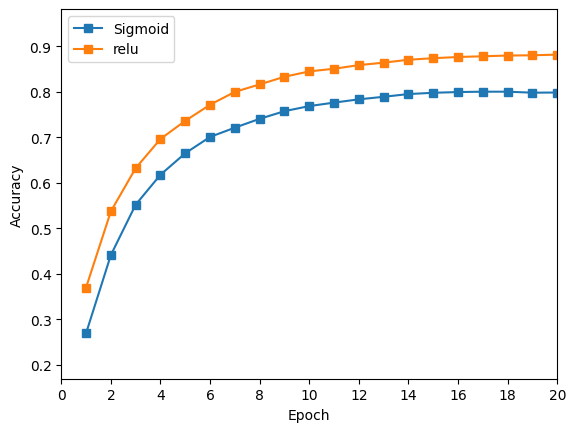

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.8348	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.8810	 Accuracy 0.0933
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.7762	 Accuracy 0.0871
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.7065	 Accuracy 0.0855
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.6527	 Accuracy 0.0838
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.6103	 Accuracy 0.0836
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.5741	 Accuracy 0.0844
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.5424	 Accuracy 0.0850
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5144	 Accuracy 0.0876
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.4906	 Accuracy 0.0894
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.4694	 Accuracy 0.0940

Epoch [0]	 Average training loss 2.4512	 Average training accuracy 0.0974
Epoch [0]	 Average validation loss 2.2445	 Average validation accuracy 0.1546

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2330	 Accuracy 0.1500

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7001.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5881	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5378	 Accuracy 0.0982
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4863	 Accuracy 0.1090
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4363	 Accuracy 0.1189
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3909	 Accuracy 0.1353
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3469	 Accuracy 0.1510
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3076	 Accuracy 0.1680
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2730	 Accuracy 0.1848
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2366	 Accuracy 0.2044
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2048	 Accuracy 0.2227
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1741	 Accuracy 0.2402

Epoch [0]	 Average training loss 2.1450	 Average training accuracy 0.2577
Epoch [0]	 Average validation loss 1.8066	 Average validation accuracy 0.4752

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7332	 Accuracy 0.5200

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8680.



## 绘制曲线

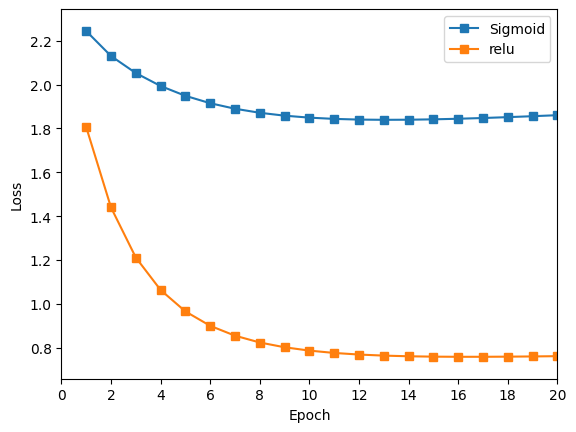

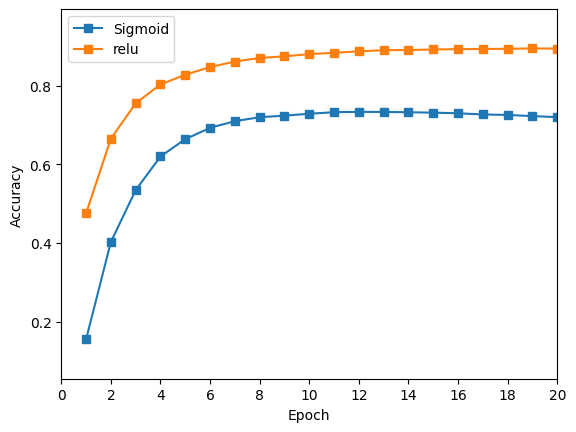

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.3731	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 3.1522	 Accuracy 0.0963
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.9784	 Accuracy 0.1000
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.8631	 Accuracy 0.0979
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.7793	 Accuracy 0.0937
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.7151	 Accuracy 0.0875
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.6634	 Accuracy 0.0828
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.6216	 Accuracy 0.0824
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.5872	 Accuracy 0.0818
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.5579	 Accuracy 0.0836
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.5338	 Accuracy 0.0834

Epoch [0]	 Average training loss 2.5134	 Average training accuracy 0.0840
Epoch [0]	 Average validation loss 2.3014	 Average validation accuracy 0.0942

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.3068	 Accuracy 0.1100

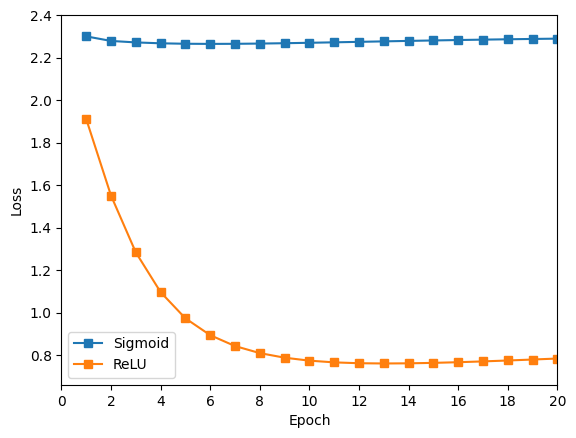

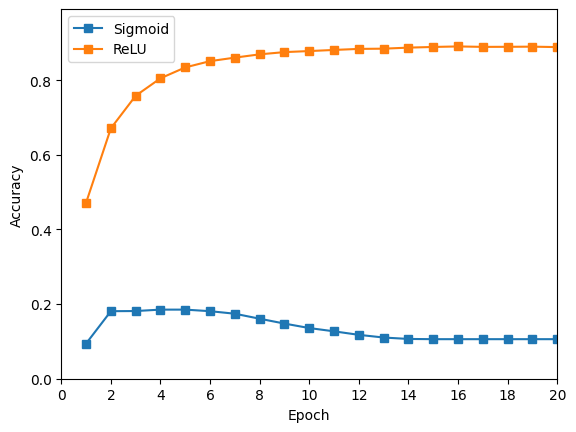

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, SigmoidLayer, ReLULayer

# MNIST 数据加载
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])  # 28*28=784
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

batch_size = 100
max_epoch = 20
learning_rate_SGD = 0.001
weight_decay = 0.1
disp_freq = 50

# 更新SGD优化器配置，使用Softmax交叉熵损失
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

# 构建使用Sigmoid激活函数的MLP，具有两个隐含层
sigmoidMLP = Network()
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

# 构建使用ReLU激活函数的MLP，具有两个隐含层
reluMLP = Network()
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

# 训练和测试Sigmoid模型
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

# 训练和测试ReLU模型
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(reluMLP, criterion, data_test, batch_size, disp_freq)

# 绘制损失和准确率曲线
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'ReLU': [relu_loss, relu_acc]})